In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1).astype('float32')

In [ ]:

# Task 1: Normalization
# 1. Compute mean and standard deviation
mean = X_train_flat.mean()
std = X_train_flat.std()

In [ ]:
print(f"Mean of the dataset: {mean}")
print(f"Standard Deviation of the dataset: {std}")

Mean of the dataset: 33.31844711303711
Standard Deviation of the dataset: 78.56744384765625


In [ ]:

# 2nd method
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_flat)

In [ ]:

#3rd method
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train_flat)

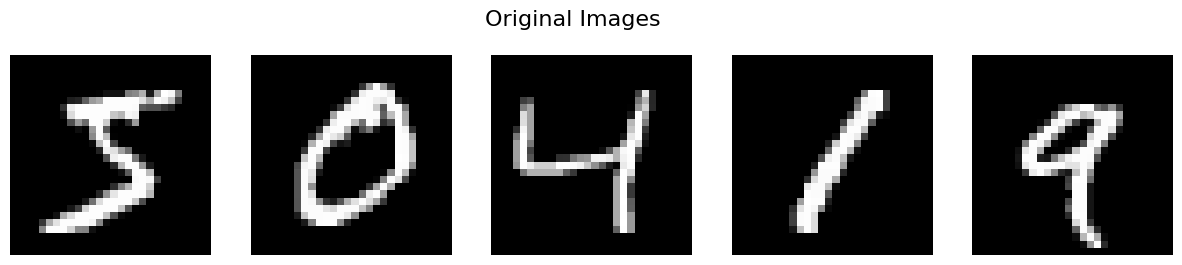

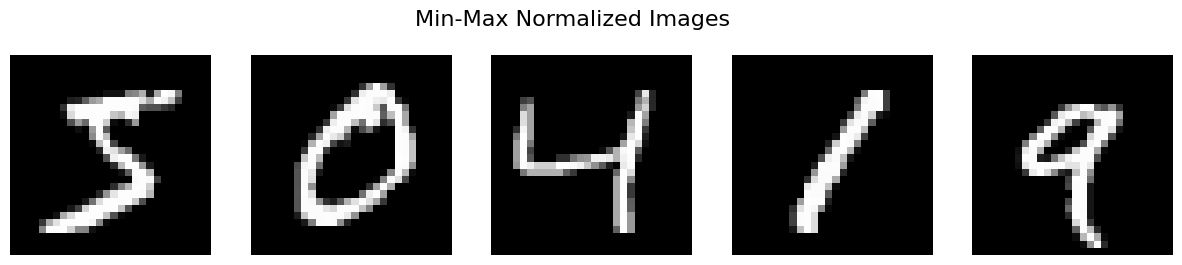

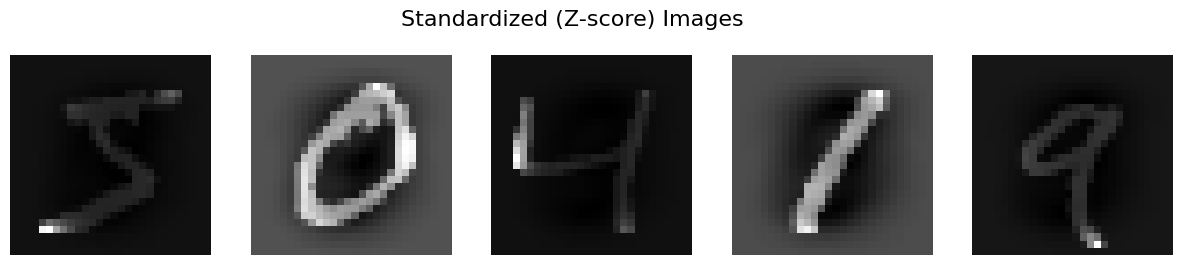

In [ ]:
# Visualization
def visualize_images(data, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes):
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()


                                    # Visualize original, Min-Max, and Standardized images
visualize_images(X_train[:5], 'Original Images')
visualize_images(X_train_minmax[:5], 'Min-Max Normalized Images')
visualize_images(X_train_standard[:5], 'Standardized (Z-score) Images')

In [ ]:
 # Task 2: Augmentation
sample_image = X_train[0].reshape(28, 28)
sample_image = np.expand_dims(sample_image, axis=-1)

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.15,
      zoom_range=0.15,
      horizontal_flip=True,
      fill_mode='nearest'
      )

In [ ]:
augmented_images = [datagen.random_transform(sample_image) for _ in range(5)]

(-0.5, 27.5, 27.5, -0.5)

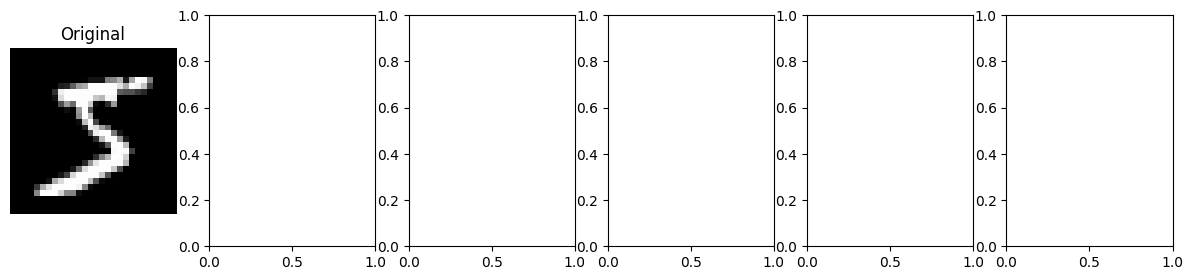

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
axes[0].imshow(sample_image.squeeze(), cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

In [ ]:
for i, ax in enumerate(axes[1:]):
    ax.imshow(augmented_images[i].squeeze(), cmap='gray')
    ax.set_title(f'Aug {i+1}')
    ax.axis('off')

plt.suptitle('Augmented Images', fontsize=16)
plt.show()

<Figure size 640x480 with 0 Axes>